# ¿Un modelo equivocado?

## Una fuente de error.

Se considera un tipo de error cuando consideramos un modelo que no está en congruencia con la física. Veamos el siguiente ejemplo.

### Planteando el problema.

La bicicleta es una forma muy eficiente de transporte, este es un hecho bien conocido por cualquier persona que la utliza.

Nuestro objetivo en este ejercicio es comprender los factores que determinan la velocidad máxima de una bicicleta y estimar la velocidad de un caso real.

Comenzaremos haciendo *caso omiso de la fricción*; tendremos que añadirlo al final, por supuesto, pero debemos primero entender cómo lidiar con el caso más simple y sin fricción.

### Usando la mecánica de Newton.

La ecuación de movimiento corresponde a la segunda ley de Newton, que escribimos de la forma:
$$ \begin{equation}
\dfrac{dv}{dt} = \dfrac{F}{m}
\label{EqNewton2} \tag{1}
\end{equation}
$$
donde $v$ es la velocidad, $m$ es la masa de la combinación de la bicicleta-conductor, $t$ es el tiempo, y $F$ es la fuerza en la bicicleta que viene del esfuerzo del conductor (en este caso vamos a suponer que la bicicleta se mueve sobre un terreno plano).

Tratar correctamente a $F$ se complica por la mecánica de la bicicleta, ya que la fuerza ejercida por el ciclista se transmite a las ruedas por medio del plato, engranajes, cadena, etc. Esto hace que sea muy difícil obtener una expresión exacta para $F$.

### Abordando el problema con otro enfoque.

Sin embargo, hay otra manera de abordar este problema que evita la necesidad de conocer la fuerza. Este enfoque alternativo implica la formulación del problema en términos de la potencia generada por el ciclista.

Estudios fisiológicos de ciclistas de carreras han demostrado que estos atletas son capaces de producir una potencia de salida de aproximadamente $400$ Watts durante largos períodos de tiempo ($\sim 1$ hora).

Usando las ideas de trabajo-energía podemos reescribir (\ref{EqNewton2}) como:
$$
\begin{equation}
\dfrac{dE}{dt} = P
\label{EqPotencia} \tag{2}
\end{equation}
$$
donde $E$ es la energía total, $P$ es la potencia de salida del ciclista.

Para un trayecto plano la energía es totalmente cinética, es decir, $E = \frac{1}{2} m v^{2}$, y $dE/dt = m \, v (dv/dt)$, usando esto en la ec. (\ref{EqPotencia}), resulta:
$$
\begin{equation}
\dfrac{dv}{dt} = \dfrac{P}{m \, v}
\label{EqPotenciavel} \tag{3}
\end{equation}$$

Si $P$ es una constante, la ecuación (\ref{EqPotenciavel}), se puede resolver de manera analítica, rearreglando términos:

$$ 
\begin{equation}
\int_{v_{0}}^{v} v^{\prime} d v^{\prime} = \int_{0}^{t} \dfrac{P}{m} d t^{\prime}
\label{EqIntegral} \tag{4}
\end{equation}
$$
donde $v_{0}$ es la velocidad de la bicicleta en $t = 0$.

Integrando ambos lados de la ecuación y resolviendo para $v$, tenemos que:
$$
\begin{equation}\label{Eqvres}
v = \sqrt{v_{0}^{2} + 2 \, P \dfrac{t}{m}} \tag{5}
\end{equation} $$

**¿La solución es consistente con la física?**

Si bien esta es la solución correcta de la ecuación de movimiento (\ref{EqPotenciavel}), nuestro trabajo no concluye aquí: ya que predice que la velocidad se incrementará sin límite para tiempos muy largos.

Este resultado *no es congruente* con la física que conocemos.

Vamos a corregir este resultado: cuando se generaliza el modelo se debe de *incluir el efecto de la resistencia del aire*

El nuevo término que vamos a añadir a la ecuación de movimiento nos obliga a desarrollar una solución numérica, así que con eso en mente se considera un tratamiento numérico de la ec. (\ref{EqPotenciavel}).

Comenzamos con la forma de diferencias finitas para estimar la derivada de la velocidad:

$$ \begin{equation}
\dfrac{dv}{dt} \simeq \dfrac{v_{i + 1} - v_{i}}{\Delta t}
\label{Eqderivada} \tag{6}
\end{equation}
$$
donde asumimos que $\Delta t$ es paso discreto pequeño, y $v_{i}$ es la velocidad al tiempo $t_{i} \equiv i \Delta t$.


Por lo que de la ecuación (\ref{EqPotenciavel}):
$$
\begin{equation}
v_{i + 1} = v_{i} + \dfrac{P}{m \, v_{i}} \, \Delta \, t
\label{Eqveli+1} \tag{7}
\end{equation}
$$

Dada la velocidad en un tiempo $i$ (es decir, $v_{i}$), podemos usar (\ref{Eqveli+1}) para calcular un valor *aproximad* de la velocidad en el siguiente paso $v_{i+1}$.


Si conocemos la velocidad inicial $v_{0}$, podemos obtener $v_{1}$, $v_{2}$, y así sucesivamente.

### Proponemos un código en python.

Ya contamos con suficientes elementos para proponer un código en python, incluiremos una gráfica del resultado.

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt

t = []
v = []

dt = 1

potencia = 400
masa = 70
tmax = 200
nmax = tmax/dt

t.append(0)
v.append(4)

for i in range(int(tmax/dt)):
    ti = t[i-1] + dt
    vi = sqrt(v[i]**2 + (2 * potencia * dt)/masa)
    
    
    t.append(ti)
    v.append(vi)

plt.plot(v, "r-")
plt.xlabel("tiempo [s]")
plt.ylabel("velocidad m/s")
plt.show()

## ¿Tenemos un resultado correcto?

Consideremos que:
1. Hemos desarrollado un algoritmo que resuelve el problema inicial.
2. Los valores son consistentes.
3. La gráfica nos indica el comportamiento de la solución.

Aún así: **¿debemos de considerar el problema como bien resuelto?**


## Considerando la fricción del aire.

### Segunda aproximación.

La fuerza debida a la fricción puede aproximarse de manera inicial como:
$$
\begin{equation}
F_{a} \simeq - B_{1} \, v - B_{2} v^{2}
\label{EqFfriccion}
\end{equation}
$$
Para velocidades muy bajas, el primer término es el que domina, y el coeficiente $B_{1}$ se puede calcular para objetos con formas sencillas.

Para una velocidad razonable $v^{2}$ el término domina sobre los demás, pero $B_{2}$ no puede calcularse exactamente en objetos sencillos como una pelota de beisbol, menos para una bicicleta.

Podemos aproximar el valor de $B_{2}$ como sigue: Si un objeto se mueve a través de la atmósfera, debe empujar fuera del camino el aire delante de él. 

La masa de aire movida en el tiempo $d t$ es 
$$m_{\text{aire}} \sim \rho A \: v \: dt$$

donde $\rho$ es la densidad del aire y $A$ el área frontal del objeto.

Este aire tiene una velocidad de orden $v$, y por lo tanto, su energía cinética es $$E_{\text{aire}} \sim m_{\text{aire}} \: v^{2} / 2$$

Este es también el trabajo realizado por la fuerza de arrastre (la fuerza sobre el objeto debido a la resistencia del aire) en el tiempo $d t$, por lo tanto: $$F_{a} \: d t = E_{\text{aire}}$$

Al juntar estos resultados, encontramos que:
$$
\begin{align*}
F_{a} \simeq - C \: \rho \: A \: v^{2}
\end{align*}
$$

### Nueva expresión.

Incluyendo este término en la expresión para la velocidad:
$$
\begin{equation}
v_{i+1} = v_{i} + \dfrac{P}{m \: v_{i}} \Delta \: t - \dfrac{C \: \rho \: A \: v_{i}^{2}}{m} \: \Delta \: t
\label{Eqvelifriccion}
\end{equation}
$$

### A escribir el código necesario. Ejercicio a resolver y entregar.

Implementa el código en python, considerando los valores $C = 0.5$ y $A=0.33$. De tal manera que al obtener la gráfica de la solución, debes de presentar una figura con el siguiente resultado:
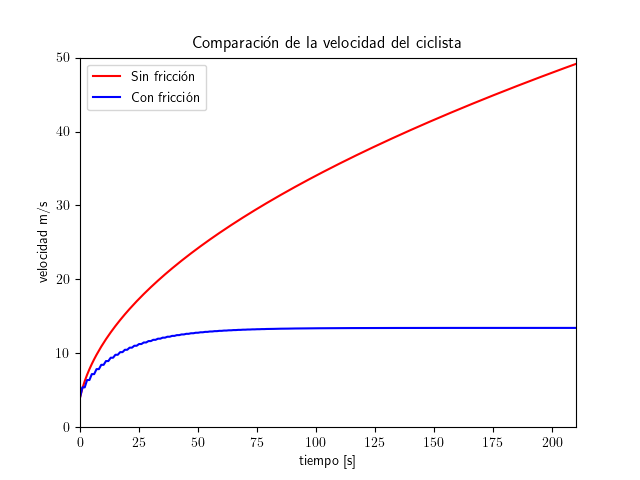